In [1]:
import os
import cv2
import numpy as np

In [2]:
def create_patches(image_folder, mask_folder, output_folder, patch_size=512, batch_size=10):
    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.jpg')])
    mask_files = sorted([f for f in os.listdir(mask_folder) if f.endswith('_lab.png')])
    
    assert len(image_files) == len(mask_files), "Number of images and masks must be the same"

    def save_patches(img, mask, base_name, output_folder):
        img_height, img_width = img.shape[:2]
        for i in range(0, img_width, patch_size):
            for j in range(0, img_height, patch_size):
                if i + patch_size <= img_width and j + patch_size <= img_height:
                    img_patch = img[j:j + patch_size, i:i + patch_size]
                    mask_patch = mask[j:j + patch_size, i:i + patch_size]
                    cv2.imwrite(os.path.join(output_folder, 'images', f"{base_name}_{i}_{j}.jpg"), img_patch)
                    cv2.imwrite(os.path.join(output_folder, 'masks', f"{base_name}_{i}_{j}_lab.png"), mask_patch)

    os.makedirs(os.path.join(output_folder, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_folder, 'masks'), exist_ok=True)

    for batch_start in range(0, len(image_files), batch_size):
        batch_end = min(batch_start + batch_size, len(image_files))
        for idx in range(batch_start, batch_end):
            img_path = os.path.join(image_folder, image_files[idx])
            mask_path = os.path.join(mask_folder, mask_files[idx])
            
            img = cv2.imread(img_path)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            
            base_name = os.path.splitext(image_files[idx])[0]
            save_patches(img, mask, base_name, output_folder)

        print(f"Processed batch {batch_start // batch_size + 1} / {(len(image_files) + batch_size - 1) // batch_size}")


In [ ]:
# Define the paths to your train, test, or val folders
image_folder = "path here"
mask_folder = "path here"
output_folder = "path here"

create_patches(image_folder, mask_folder, output_folder)

In [ ]:
image_folder = "path here"
mask_folder = "path here"
output_folder = "path here"

create_patches(image_folder, mask_folder, output_folder)

In [ ]:
image_folder ="path here"
mask_folder = "path here"
output_folder = "path here"

create_patches(image_folder, mask_folder, output_folder)

In [ ]:
import random
import matplotlib.pyplot as plt

def display_random_patches(patches_folder, num_samples=5):
    image_patches_folder = os.path.join(patches_folder, 'images')
    mask_patches_folder = os.path.join(patches_folder, 'masks')
    
    image_files = sorted([f for f in os.listdir(image_patches_folder) if f.endswith('.jpg')])
    mask_files = sorted([f for f in os.listdir(mask_patches_folder) if f.endswith('_lab.png')])
    
    samples = random.sample(list(zip(image_files, mask_files)), num_samples)
    
    for image_file, mask_file in samples:
        img_path = os.path.join(image_patches_folder, image_file)
        mask_path = os.path.join(mask_patches_folder, mask_file)
        
        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {image_file}")
        
        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap='gray')
        plt.title(f"Mask: {mask_file}")
        
        plt.show()


patches_folder = "path here"

display_random_patches(patches_folder)


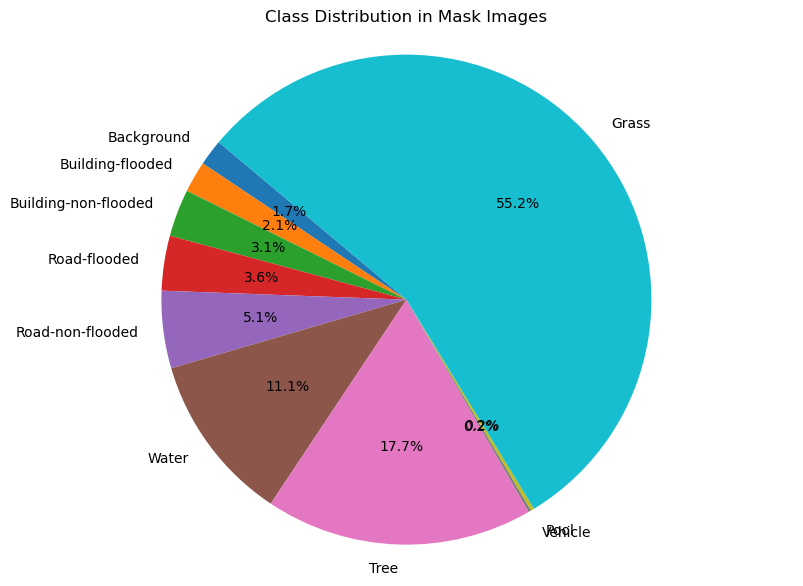

In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

mask_dir = "path here"

class_labels = {
    0: 'Background',
    1: 'Building-flooded',
    2: 'Building-non-flooded',
    3: 'Road-flooded',
    4: 'Road-non-flooded',
    5: 'Water',
    6: 'Tree',
    7: 'Vehicle',
    8: 'Pool',
    9: 'Grass'
}

class_counts = {i: np.int64(0) for i in range(10)}


for mask_filename in os.listdir(mask_dir):
    mask_path = os.path.join(mask_dir, mask_filename)
    if mask_path.endswith('.png') or mask_path.endswith('.jpg'):
        try:
            
            mask = Image.open(mask_path).convert('L')
            mask = np.array(mask, dtype=np.int64)  # Ensure the mask is of type np.int64
            
            
            unique_values = np.unique(mask)
            invalid_values = [val for val in unique_values if val not in class_counts]
            if invalid_values:
                print(f"Invalid values {invalid_values} found in {mask_filename}")
                continue  
            
            
            for class_id in range(10):
                class_counts[class_id] += np.sum(mask == class_id).astype(np.int64)
        except Exception as e:
            print(f"Error processing {mask_filename}: {e}")


for class_id, count in class_counts.items():
    if count < 0:
        print(f"Negative count for class {class_id}: {count}")


labels = [class_labels[i] for i in range(10)]
sizes = [class_counts[i] for i in range(10)]


if sum(sizes) == 0:
    print("No class data found in the mask images.")
else:
    
    plt.figure(figsize=(10, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
    plt.axis('equal')  
    plt.title('Class Distribution in Mask Images')
    plt.show()


In [5]:
import os
import numpy as np
from PIL import Image
import shutil


mask_dir = "path here"
image_dir = "path here"  
selected_dir = "path here"

# Create the directory for selected images if it doesn't exist
os.makedirs(selected_dir, exist_ok=True)

# Initialize the count for images with more than 3 unique labels
count_more_than_3_labels = 0

# Iterate over all mask images
for mask_filename in os.listdir(mask_dir):
    mask_path = os.path.join(mask_dir, mask_filename)
    if mask_path.endswith('.png') or mask_path.endswith('.jpg'):
        try:
            # Open the image as grayscale
            mask = Image.open(mask_path).convert('L')
            mask = np.array(mask)
            
            # Get the unique labels in the mask
            unique_labels = np.unique(mask)
            
            # Count the images with more than 3 unique labels
            if len(unique_labels) > 3:
                count_more_than_3_labels += 1
                # Copy the mask image to the selected directory
                shutil.copy(mask_path, os.path.join(selected_dir, mask_filename))
                # Copy the corresponding original image to the selected directory
                image_path = os.path.join(image_dir, mask_filename)
                if os.path.exists(image_path):
                    shutil.copy(image_path, os.path.join(selected_dir, mask_filename))
        except Exception as e:
            print(f"Error processing {mask_filename}: {e}")

print(f"Number of images with more than 3 unique labels: {count_more_than_3_labels}")


Number of images with more than 3 unique labels: 4339


In [6]:
import os
import shutil

# Define the paths
selected_dir = "path here"
image_dir = "path here"
output_dir = "path here"


for mask_filename in os.listdir(selected_dir):
    if mask_filename.endswith('_lab.png'):
        
        image_filename = mask_filename.replace('_lab.png', '.jpg')
        image_path = os.path.join(image_dir, image_filename)
        
       
        if os.path.exists(image_path):
            shutil.copy(image_path, os.path.join(selected_dir, image_filename))
        else:
            print(f"Original image {image_filename} not found for mask {mask_filename}")

print("Completed copying corresponding original images to the selected_images folder.")


Completed copying corresponding original images to the selected_images folder.


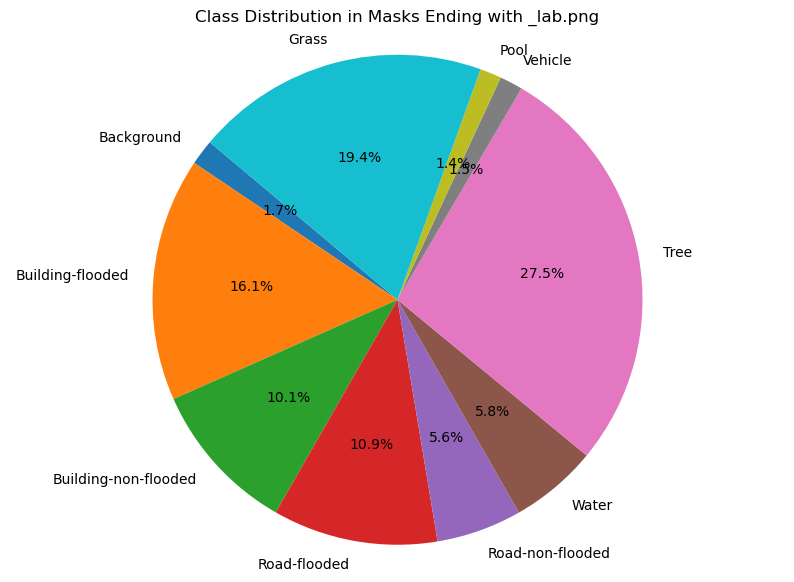

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


data_dir = r"path"  # Replace with your actual path


class_labels = {
    0: 'Background',
    1: 'Building-flooded',
    2: 'Building-non-flooded',
    3: 'Road-flooded',
    4: 'Road-non-flooded',
    5: 'Water',
    6: 'Tree',
    7: 'Vehicle',
    8: 'Pool',
    9: 'Grass'
}

class_counts = {i: 0 for i in range(10)}

for filename in os.listdir(data_dir):
    if filename.endswith('_lab.png'):
        try:
           
            mask_path = os.path.join(data_dir, filename)
            mask = Image.open(mask_path).convert('L')
            mask = np.array(mask)
            
            
            unique_labels, counts = np.unique(mask, return_counts=True)
            for label, count in zip(unique_labels, counts):
                if label in class_counts:
                    class_counts[label] += count
        except Exception as e:
            print(f"Error processing {filename}: {e}")


labels = [class_labels[i] for i in range(10)]
sizes = [class_counts[i] for i in range(10)]


plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.axis('equal')  
plt.title('Class Distribution in Masks Ending with _lab.png')
plt.show()


In [ ]:
import os
import random
import shutil


data_dir = r""  # Replace with your actual path
train_dir = r""
val_dir = r""
test_dir = r""


os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


files = os.listdir(data_dir)
random.shuffle(files)  

image_files = [file for file in files if not file.endswith('_lab.png')]


num_files = len(image_files)
train_split = int(0.6 * num_files)
val_split = int(0.2 * num_files)


train_files = image_files[:train_split]
val_files = image_files[train_split:train_split + val_split]
test_files = image_files[train_split + val_split:]

def copy_files(file_list, source_dir, dest_dir):
    for file in file_list:
        image_name, ext = os.path.splitext(file)
        mask_file = image_name + '_lab.png'
        
        
        if mask_file in files:
            src_image = os.path.join(source_dir, file)
            dst_image = os.path.join(dest_dir, file)
            src_mask = os.path.join(source_dir, mask_file)
            dst_mask = os.path.join(dest_dir, mask_file)
            
           
            shutil.copy(src_image, dst_image)
            shutil.copy(src_mask, dst_mask)


copy_files(train_files, data_dir, train_dir)
copy_files(val_files, data_dir, val_dir)
copy_files(test_files, data_dir, test_dir)

print(f"Dataset split into train: {len(train_files)}, val: {len(val_files)}, test: {len(test_files)}")
print(f"Train data stored in: {train_dir}")
print(f"Validation data stored in: {val_dir}")
print(f"Test data stored in: {test_dir}")
